# Dataset Generation 🧫




## Synthetic Data Generation

### Generating a Synthetic Dataset

In [ ]:
# Install faker package
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.5 MB/s eta 0:00:00


In [ ]:
# Imports
import numpy as np
from faker import Faker

fake = Faker()

data = [(fake.name(), np.random.randint(7, 70)) for _ in range(100)]

# Create DataFrame from the data
import pandas as pd
df = pd.DataFrame(data, columns = ['Name', 'Age'])
df.head()

,Name,Age
0,Brittney Beltran,61
1,Denise Weaver,36
2,Jeffrey Smith,61
3,Ashley Johnson,28
4,John Madden,51


### Challenge 🚀: Creating a Synthetic Sales Dataset

In [ ]:
# Generating synthetic sales data
sales_data = [(fake.word(), np.random.randint(10, 500), fake.date_this_year(), np.random.randint(18, 70)) for _ in range(500)]

sales_df = pd.DataFrame(sales_data, columns=['Product', 'Sale Amount', 'Date', 'Customer Age'])

# Display the first few rows of the DataFrame
sales_df.head()


,Product,Sale Amount,Date,Customer Age
0,citizen,317,2024-03-05,24
1,either,221,2024-03-05,19
2,spring,485,2024-08-13,64
3,development,388,2024-04-11,27
4,outside,20,2024-07-06,25


## Data Augmentation

In [ ]:
# to randomly rotate the image by an angle between -20 to +20 degrees.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rotation_range=20)

# to rotate the image buy exactly 30 degrees
from scipy.ndimage import rotate
def rotate_image_30_degrees(image):
  # Rotate image by 30 degrees
  return rotate(image, 30, reshape=False, mode='nearest')
#  Create ImageDataGenerator with custom preprocessing function
data_generator = ImageDataGenerator(preprocessing_function=rotate_image_30_degrees)

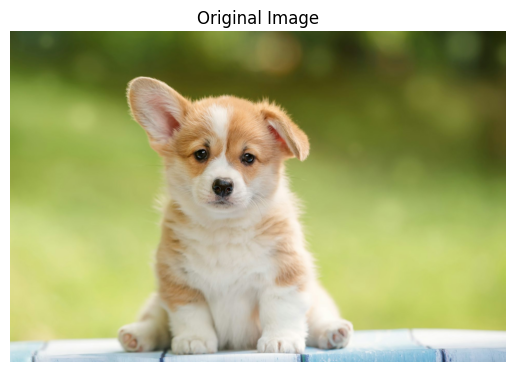

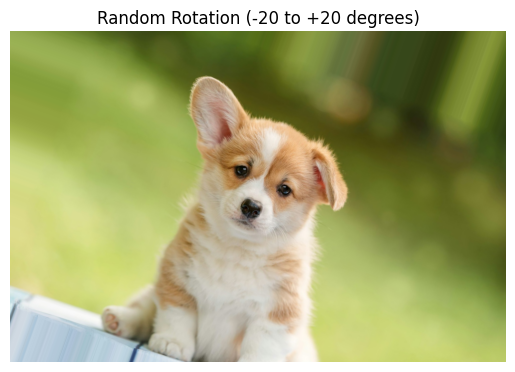

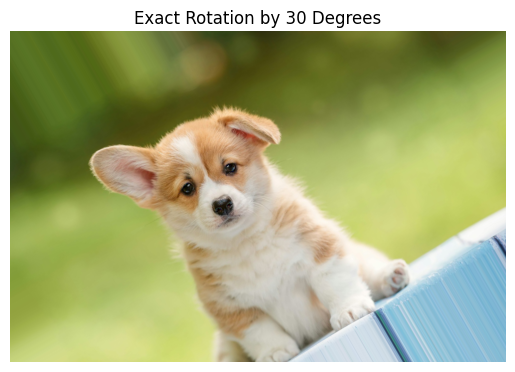

In [ ]:
# Import the libraries
import numpy as np
import requests
from io import BytesIO
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import matplotlib.pyplot as plt  # Import matplotlib to display images

# Load the image from a URL
url = "https://images.theconversation.com/files/438138/original/file-20211216-25-1hu3e65.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Convert the image to a numpy array
img_array = img_to_array(img)

# Display the original image
plt.imshow(np.uint8(img_array))
plt.title("Original Image")
plt.axis('off')
plt.show()

# 1. Randomly rotate the image by an angle between -20 and +20 degrees
data_generator = ImageDataGenerator(rotation_range=20)
rotated_img_gen = next(data_generator.flow(np.expand_dims(img_array, 0)))

# Display the image after random rotation
plt.imshow(np.uint8(rotated_img_gen[0]))
plt.title("Random Rotation (-20 to +20 degrees)")
plt.axis('off')
plt.show()

# 2. Define a function to rotate the image by exactly 30 degrees
from scipy.ndimage import rotate
def rotate_image_30_degrees(image):
    # Rotate the image by 30 degrees
    return rotate(image, 30, reshape=False, mode='nearest')

# Create an ImageDataGenerator with the custom preprocessing function
data_generator_custom = ImageDataGenerator(preprocessing_function=rotate_image_30_degrees)
rotated_img_custom = next(data_generator_custom.flow(np.expand_dims(img_array, 0)))

# Display the image after rotating it by 30 degrees
plt.imshow(np.uint8(rotated_img_custom[0]))
plt.title("Exact Rotation by 30 Degrees")
plt.axis('off')
plt.show()


### Flipping the Image (Horizontal or Vertical)

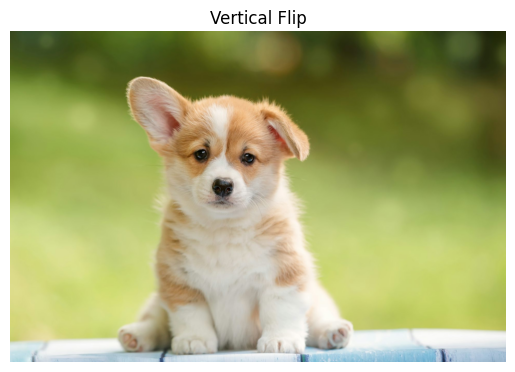

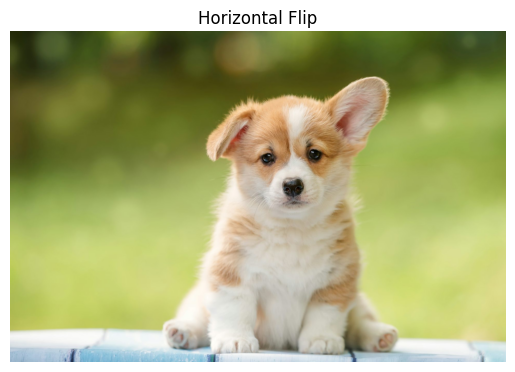

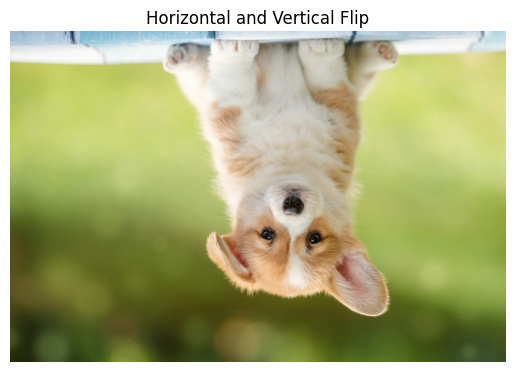

In [ ]:
# Import the necessary library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply vertical flip
data_generator_vertical = ImageDataGenerator(vertical_flip=True)
flipped_img_vert = next(data_generator_vertical.flow(np.expand_dims(img_array, 0)))

# Display the image after vertical flip
plt.imshow(np.uint8(flipped_img_vert[0]))
plt.title("Vertical Flip")
plt.axis('off')
plt.show()

# Apply horizontal flip
data_generator_horizontal = ImageDataGenerator(horizontal_flip=True)
flipped_img_horiz = next(data_generator_horizontal.flow(np.expand_dims(img_array, 0)))

# Display the image after horizontal flip
plt.imshow(np.uint8(flipped_img_horiz[0]))
plt.title("Horizontal Flip")
plt.axis('off')
plt.show()

# Apply both flips (horizontal and vertical)
data_generator_both = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
flipped_img_both = next(data_generator_both.flow(np.expand_dims(img_array, 0)))

# Display the image after both flips
plt.imshow(np.uint8(flipped_img_both[0]))
plt.title("Horizontal and Vertical Flip")
plt.axis('off')
plt.show()


### Adjusting Brightness and Contrast

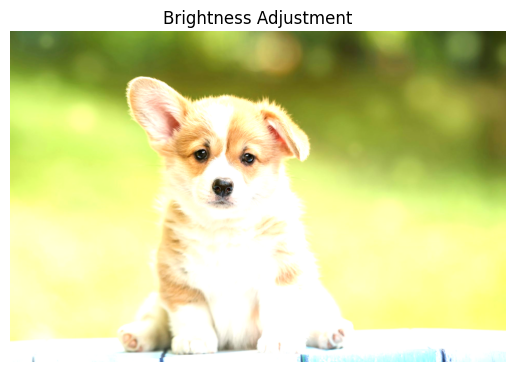

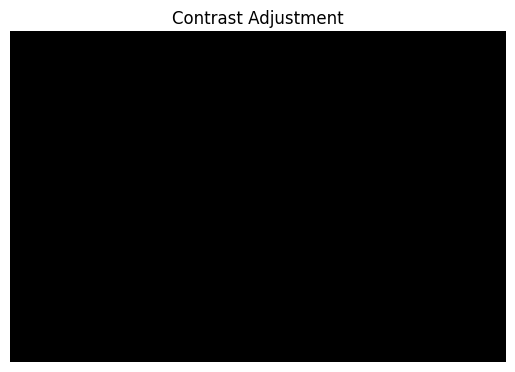

In [ ]:
# Change the brightness
data_generator_brightness = ImageDataGenerator(brightness_range=(0.5, 1.5))
brightened_img = next(data_generator_brightness.flow(np.expand_dims(img_array, 0)))

# Display the image after changing brightness
plt.imshow(np.uint8(brightened_img[0]))
plt.title("Brightness Adjustment")
plt.axis('off')
plt.show()

# Adjust contrast
from PIL import ImageEnhance, Image
import numpy as np

# Function to adjust contrast
def adjust_contrast(image):
    # Convert the image to PIL format
    pil_img = Image.fromarray((image * 255).astype(np.uint8))
    # Enhance the contrast
    contrast = ImageEnhance.Contrast(pil_img)
    pil_img_enhanced = contrast.enhance(0.2)
    # Convert back to numpy array
    return np.array(pil_img_enhanced) / 255.0

# Create an ImageDataGenerator with the custom contrast adjustment function
data_generator_contrast = ImageDataGenerator(preprocessing_function=adjust_contrast)
contrasted_img = next(data_generator_contrast.flow(np.expand_dims(img_array, 0)))

# Display the image after adjusting contrast
plt.imshow(np.uint8(contrasted_img[0]))
plt.title("Contrast Adjustment")
plt.axis('off')
plt.show()


## Exercise: Dataset Creation

Sales data:
 - Product name
 -  Sales amount
 - Sale date
 - Customer Age
 - Customer ID
 - City
 - Phone





In [ ]:

sales_data = [(fake.word(),
               np.random.randint(10, 500), fake.date_this_year(),
               np.random.randint(18, 70), fake.random_int(min=1000, max=9999),
               fake.city(), fake.phone_number())
              for _ in range(500)]

sales_df = pd.DataFrame(sales_data, columns=['Product', 'Sale Amount', 'Date', 'Customer Age', 'Customer ID', 'City', 'Phone'])
sales_df.head()

,Product,Sale Amount,Date,Customer Age,Customer ID,City,Phone
0,catch,15,2024-07-15,31,1318,New Carol,952.886.7197
1,can,315,2024-07-26,61,3706,South Gregoryville,796-598-7499x06424
2,decade,205,2024-01-13,46,4574,Elliotttown,(551)428-8465
3,return,273,2024-06-28,21,6872,North James,+1-238-496-7729x769
4,boy,47,2024-03-09,26,8181,Alexisfurt,+1-557-559-9466x64828
